In [2]:
import pandas as pd
import tensorflow as tf

import numpy as np
import keras

from matplotlib import pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer


df = pd.read_csv("Salary.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.columns,df.dtypes

(Index(['YearsExperience', 'Salary'], dtype='object'),
 YearsExperience    float64
 Salary             float64
 dtype: object)

In [4]:
df["YearsExperience"] = pd.to_numeric(df["YearsExperience"],errors='coerce')

In [5]:
df = df.dropna()


In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# x = ppl/television
# y = ppl/doctor

x = df["YearsExperience"].values.reshape(-1,1).astype(np.float64)
y = df["Salary"].values.reshape(-1,1).astype(np.float64)

x.shape,y.shape

((30, 1), (30, 1))

Epoch 1/10
30/30 [==============================] - 0s 688us/step - loss: 0.0994
Epoch 2/10
30/30 [==============================] - 0s 619us/step - loss: 0.0609
Epoch 3/10
30/30 [==============================] - 0s 653us/step - loss: 0.0494
Epoch 4/10
30/30 [==============================] - 0s 585us/step - loss: 0.0459
Epoch 5/10
30/30 [==============================] - 0s 619us/step - loss: 0.0449
Epoch 6/10
30/30 [==============================] - 0s 585us/step - loss: 0.0445
Epoch 7/10
30/30 [==============================] - 0s 550us/step - loss: 0.0444
Epoch 8/10
30/30 [==============================] - 0s 585us/step - loss: 0.0444
Epoch 9/10
30/30 [==============================] - 0s 619us/step - loss: 0.0444
Epoch 10/10
30/30 [==============================] - 0s 619us/step - loss: 0.0444


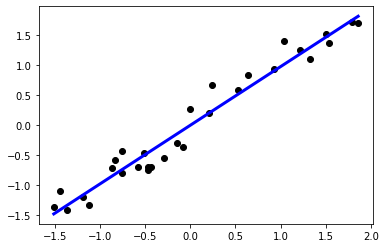

In [8]:
from tensorflow.keras.optimizers import SGD
sc = StandardScaler()
x_ = sc.fit_transform(x)
y_ = sc.fit_transform(y)

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)

model = Model(inputs=inputs,outputs=preds)
sgd=tf.keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse')
model.fit(x_,y_, batch_size=1, verbose=1, epochs=10, shuffle=False)
plt.scatter(x_,y_,color='black')
plt.plot(x_,model.predict(x_), color='blue', linewidth=3)